In [1]:
from analysis import tf_idf

X_by_line = tf_idf.get_lines_tf_idf('../data/raw/dataset_poll_fr.csv')

In [3]:
lines, X = zip(*X_by_line.items())

/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


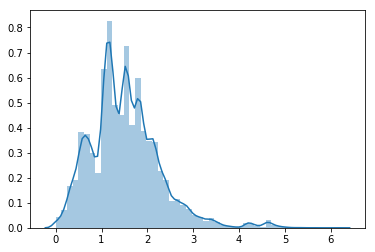

In [4]:
# Plotting distribution of distances
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns
%matplotlib inline

nana = distance_matrix(X, X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


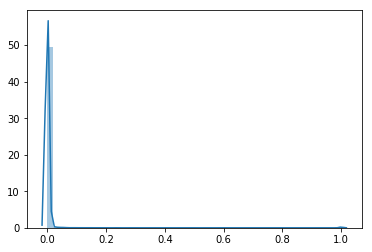

In [5]:
# Plotting distribution of distances
from sklearn.metrics.pairwise import cosine_similarity

nana = cosine_similarity(X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


In [11]:
# Let's try to DB-Scan with smaller distance of 1
from collections import Counter
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps=0.5, metric='cosine')
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 317})


In [12]:
# Finds that 284 propositions are unclustered,
# and 155 belongs to same cluster
# So it does not find small group of similar proposition.
# Try smaller epsilon
clf = DBSCAN(eps=.25)
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 276, 0: 41})


In [13]:
# Let's see which lines are together
from pprint import pprint

# Sample of splitted lines
for line in lines[:10]:
    print(line)


 aide financière pour aider les handicapés en cas de déménagement 
Votre consultation préformatée dans un cadre néolibéral c est du pipeau
 appartement rez de chaussée réservé aux handicapés
Aujourd hui quelques personnes en France font régner un sentiment d insécurité et de désordre j entends qu il y des problèmes mais les mouvements désordonnés et souvent extrêmes font plus de mal que de bien à une France qui veut travailler et vivre paisiblement 
3 L ISF n est pas basé sur le revenu mais sur le patrimoine détenu
 Amnistie de tous les GJ emprisonné avec indemnisation aussi pour les blesser et dégâts matériel occasionner par les forces de l ordre
 Arrêt des privilèges de cette caste
 On en paye déjà suffisamment et baisser la TVA et baisser les cotisations salariales
 Il faut aussi que les indemnités dépensées des députés soient toutes justifiées et publiées sur internet comme dans les pays scandinaves et ça les députés ne le voterons jamais aux mêmes ils ne vont pas se tirer une ball

In [14]:
clustered_lines = [line for line, label in zip(lines, labels) if label == 0]
for line in clustered_lines[:20]:
    print(line)


Imposé toutes les grosses sociétés en France
Création de quotas de migrants tout en les accueillants dignement 
Arrêt des prestations distribuées à ces mêmes étrangers
 Plus de moyens pour nos services publics pompiers urgences
 Transports en commun gratuits
Pouvoir d achat Finir les fins de mois
Il n y a pas d économie sans capital
l handicaps le pouvoirs d achats 
il faut mettre en place le ric
 Il ne leur restait que 25 de leur revenu
 Ca doit être pareil pour eux
mais vue se que l on me prend sur ma paye 
Que les écoles alternatives soient plus nombreuses et gratuites
Il faut arrêter de monter toutes sortes de taxes 
 Il est élu par le peuple et pour le peuple et doit lui rendre des comptes
 Obligation de payer ses impôts en France pour tous citoyens français 
La même justice pour tous
Gouvernement beaucoup trop payés Trop de lois tu les lois
stop à la paie des politiques si plus de 2 absences
Revoir la répartition des richesses


In [15]:
# After analysis, this approach finds that, are similar, propositions with very few words
# (So, with few words in sentence, the difference between words in one and not in the other is not very big.)

In [16]:
from analysis import word_to_vec

X_by_line = word_to_vec.get_x_by_line('../data/raw/dataset_poll_fr.csv', '../data/raw/cc.fr.300.vec.gz')

In [17]:
lines, X = zip(*X_by_line.items())

/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


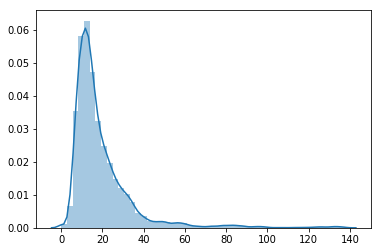

In [18]:
# Plotting distribution of distances
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import seaborn as sns
%matplotlib inline

nana = distance_matrix(X, X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


/home/arnaud/.virtualenvs/data-analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


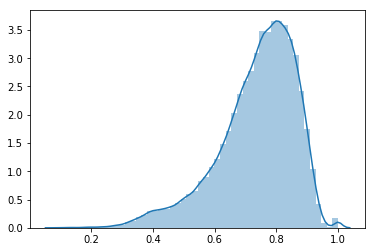

In [19]:
# Plotting distribution of distances
from sklearn.metrics.pairwise import cosine_similarity

nana = cosine_similarity(X)
dists = nana.reshape((-1, 1))
sns.distplot(dists)
plt.show()


In [23]:
# Let's try to DB-Scan with smaller distance of 1
from collections import Counter
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps=0.05, metric='cosine')
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 289, 0: 21, 1: 7})


In [25]:
clustered_lines = [line for line, label in zip(lines, labels) if label == 1]
for line in clustered_lines[:20]:
    print(line)


 De plus les employeurs demandent à minima d avoir le bac et le permis de conduire
 Mettre fin au harcèlement et à la répression routière avec des sanctions appliquer que dans le cas d un accident puis fin de l assurance obligatoire pour tout types de moyens de locomotion
nous voudrions aussi la création d hébergement d urgence pour les SDF et arrêter de les chasser des rues Plus de banc et d endroits à labris du vent la gratuite des transports en communs légalisation du cannabis 
La démocratie occidentale et vieille et aurait besoin d être revue il serait important d aller vers plus d autogestion moins d autoritarisme moins de centralisme et de laisser s épanouir les initiatives individuelles et collectives de de base les citoyens sont matures pour d autres formes de vraie démocratie participative
Revoir le statut de fonctionnaire particulièrement dans l administration pourquoi l administration du privé arrive à être efficace pas de perte de dossier peu de temps pour répondre à une de

In [12]:
# Still, whatever I try, all documents are clustered in same group
from collections import Counter
from sklearn.cluster import DBSCAN
clf = DBSCAN(eps=5)
labels = clf.fit_predict(X)
print(Counter(labels))

Counter({-1: 243, 0: 74})
